In [149]:
 from google.colab import drive
 drive.mount('/content/gdrive')
 %cd'gdrive/My Drive/Colab Notebooks/Thesis/MiceAlgo'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
[Errno 2] No such file or directory: 'gdrive/My Drive/Colab Notebooks/Thesis/MiceAlgo'
/content/gdrive/My Drive/Colab Notebooks/Thesis/MiceAlgo


In [150]:
import pandas as pd
import numpy as np
data=pd.read_csv('baseline.csv')
data.head()
test=data.copy()

In [151]:

data.info()
data=data.replace('NA',None)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2301 entries, 0 to 2300
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   st_no           2301 non-null   object 
 1   age             2300 non-null   float64
 2   sex             2301 non-null   object 
 3   wt              2296 non-null   float64
 4   day_ill         2301 non-null   int64  
 5   his_tired       2298 non-null   object 
 6   his_vomit       2295 non-null   object 
 7   ttest           2289 non-null   object 
 8   temp            2299 non-null   float64
 9   pulse           2297 non-null   float64
 10  sys_bp          2298 non-null   float64
 11  mucosal_bleed   2283 non-null   object 
 12  abdominal_pain  2291 non-null   object 
 13  liver           2279 non-null   float64
 14  hct_bsl         2259 non-null   float64
 15  plt_bsl         2258 non-null   float64
 16  serotype2       2152 non-null   object 
 17  serology        2271 non-null   o

In [152]:
data.drop(['st_no', 'serotype2' , 'serology'],axis='columns', inplace = True)

In [153]:
conversion_parameters = ['sex' ,'his_tired','his_vomit','ttest','mucosal_bleed','abdominal_pain','to_PICU','shock','doi_shock','bleed_hos']
data[conversion_parameters] = np.where(pd.isnull(data[conversion_parameters]),data[conversion_parameters],data[conversion_parameters].astype(str))

In [154]:
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
df = data.copy()

In [155]:
df[conversion_parameters] = df[conversion_parameters].astype("str").apply(en.fit_transform)
df = df.where(~data.isna(), data)
df

,age,sex,wt,day_ill,his_tired,his_vomit,ttest,temp,pulse,sys_bp,mucosal_bleed,abdominal_pain,liver,hct_bsl,plt_bsl,to_PICU,shock,doi_shock,bleed_hos,minPLT_3to8,dminPLT_3to8,maxHCT_3to8,dmaxHCT_3to8,maxhemo_3to8
0,13.0,1,31.0,3,0,1,NaN,NaN,NaN,NaN,0,1,2.0,NaN,NaN,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN
1,12.0,0,37.0,2,1,1,1,38.0,100.0,100.0,0,0,0.0,38.0,184000.0,0,0,NaN,1,NaN,NaN,NaN,NaN,NaN
2,11.0,1,27.0,4,1,0,2,38.5,90.0,80.0,0,0,0.0,40.8,220000.0,0,0,NaN,1,140000.0,6.0,40.8,4.0,2.000000
3,13.0,1,20.0,3,1,0,1,38.0,100.0,90.0,0,0,0.0,39.3,91000.0,0,0,NaN,1,41400.0,4.0,45.7,4.0,12.839506
4,11.0,1,27.0,3,1,1,1,40.5,100.0,90.0,0,0,0.0,34.0,92000.0,0,0,NaN,0,30000.0,6.0,45.9,6.0,14.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2296,13.0,0,39.0,3,0,0,2,40.0,100.0,100.0,0,0,0.0,41.8,153000.0,0,0,NaN,1,102000.0,5.0,44.3,4.0,15.064935
2297,13.0,0,53.0,3,1,0,1,40.0,100.0,100.0,0,0,0.0,37.5,160000.0,0,0,NaN,1,88000.0,6.0,42.0,5.0,10.526316
2298,9.0,0,27.5,2,1,0,1,39.0,118.0,100.0,0,0,0.0,34.4,163000.0,0,0,NaN,1,120000.0,7.0,37.8,3.0,8.000000
2299,10.0,0,33.0,4,1,1,1,39.9,100.0,100.0,0,0,0.0,37.5,75000.0,0,0,NaN,1,75000.0,4.0,43.0,5.0,16.216216


In [156]:
# check unique values for the conversion
for labels in conversion_parameters:
    print(f'{labels} : ',df[labels].unique())
    

sex :  [1 0]
his_tired :  [0 1 nan]
his_vomit :  [1 0 nan]
ttest :  [nan 1 2 0]
mucosal_bleed :  [0 1 nan]
abdominal_pain :  [1 0 nan]
to_PICU :  [1 0]
shock :  [1 0]
doi_shock :  [1 nan 2 3 0 4 5]
bleed_hos :  [nan 1 0 3 2]


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2301 entries, 0 to 2300
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2300 non-null   float64
 1   sex             2301 non-null   int64  
 2   wt              2296 non-null   float64
 3   day_ill         2301 non-null   int64  
 4   his_tired       2298 non-null   object 
 5   his_vomit       2295 non-null   object 
 6   ttest           2289 non-null   object 
 7   temp            2299 non-null   float64
 8   pulse           2297 non-null   float64
 9   sys_bp          2298 non-null   float64
 10  mucosal_bleed   2283 non-null   object 
 11  abdominal_pain  2291 non-null   object 
 12  liver           2279 non-null   float64
 13  hct_bsl         2259 non-null   float64
 14  plt_bsl         2258 non-null   float64
 15  to_PICU         2301 non-null   int64  
 16  shock           2301 non-null   int64  
 17  doi_shock       143 non-null    o

<h1>Mice Algorithm</h1>

In [158]:
import pandas as pd 
import numpy as np 
# importing the MICE from fancyimpute library 
from fancyimpute import IterativeImputer 
  

In [159]:
# calling the  MICE class 
mice_imputer = IterativeImputer() 
# imputing the missing value with mice imputer 
arr= mice_imputer.fit_transform(df) 
df_mice = pd.DataFrame(data=arr,columns=['age','sex','wt','day_ill','his_tired','his_vomit','ttest','temp','pulse','sys_bp','mucosal_bleed','abdominal_pain','liver','hct_bsl','plt_bsl','to_PICU','shock','doi_shock','bleed_hos','minPLT_3to8','dminPLT_3to8','maxHCT_3to8','dmaxHCT_3to8','maxhemo_3to8',])
df_mice.head()
  

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

,age,sex,wt,day_ill,his_tired,his_vomit,ttest,temp,pulse,sys_bp,mucosal_bleed,abdominal_pain,liver,hct_bsl,plt_bsl,to_PICU,shock,doi_shock,bleed_hos,minPLT_3to8,dminPLT_3to8,maxHCT_3to8,dmaxHCT_3to8,maxhemo_3to8
0,13.0,1.0,31.0,3.0,0.0,1.0,1.116529,38.982842,108.017513,98.589002,0.0,1.0,2.0,40.917124,74066.507979,1.0,1.0,1.000000,2.236187,-9714.956604,5.328458,50.308819,4.515301,28.737425
1,12.0,0.0,37.0,2.0,1.0,1.0,1.000000,38.000000,100.000000,100.000000,0.0,0.0,0.0,38.000000,184000.000000,0.0,0.0,2.624606,1.000000,90022.364497,5.552794,43.215775,5.035055,11.949936
2,11.0,1.0,27.0,4.0,1.0,0.0,2.000000,38.500000,90.000000,80.000000,0.0,0.0,0.0,40.800000,220000.000000,0.0,0.0,3.881320,1.000000,140000.000000,6.000000,40.800000,4.000000,2.000000
3,13.0,1.0,20.0,3.0,1.0,0.0,1.000000,38.000000,100.000000,90.000000,0.0,0.0,0.0,39.300000,91000.000000,0.0,0.0,1.522340,1.000000,41400.000000,4.000000,45.700000,4.000000,12.839506
4,11.0,1.0,27.0,3.0,1.0,1.0,1.000000,40.500000,100.000000,90.000000,0.0,0.0,0.0,34.000000,92000.000000,0.0,0.0,2.600002,0.000000,30000.000000,6.000000,45.900000,6.000000,14.750000


In [160]:
df_mice = df_mice.astype(int)

In [161]:
df_mice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2301 entries, 0 to 2300
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             2301 non-null   int64
 1   sex             2301 non-null   int64
 2   wt              2301 non-null   int64
 3   day_ill         2301 non-null   int64
 4   his_tired       2301 non-null   int64
 5   his_vomit       2301 non-null   int64
 6   ttest           2301 non-null   int64
 7   temp            2301 non-null   int64
 8   pulse           2301 non-null   int64
 9   sys_bp          2301 non-null   int64
 10  mucosal_bleed   2301 non-null   int64
 11  abdominal_pain  2301 non-null   int64
 12  liver           2301 non-null   int64
 13  hct_bsl         2301 non-null   int64
 14  plt_bsl         2301 non-null   int64
 15  to_PICU         2301 non-null   int64
 16  shock           2301 non-null   int64
 17  doi_shock       2301 non-null   int64
 18  bleed_hos       2301 non-nul

In [162]:
# check unique values for the conversion
for labels in conversion_parameters:
    print(f'{labels} : ',df_mice[labels].unique())
    

sex :  [1 0]
his_tired :  [0 1]
his_vomit :  [1 0]
ttest :  [1 2 0]
mucosal_bleed :  [0 1]
abdominal_pain :  [1 0]
to_PICU :  [1 0]
shock :  [1 0]
doi_shock :  [1 2 3 4 0 5 6 7]
bleed_hos :  [ 2  1  0  3 -3 -5 -1]


<p>sex :  [1 0]</p>
<p>his_tired :  [0 1 nan]</p>
<p>his_vomit :  [1 0 nan]</p>
<p>ttest :  [nan 1 2 0]</p>
<p>mucosal_bleed :  [0 1 nan]</p>
<p>abdominal_pain :  [1 0 nan]</p>
<p>to_PICU :  [1 0]</p>
<p>shock :  [1 0]</p>
<p>doi_shock :  [1 nan 2 3 0 4 5]</p>
<p>bleed_hos :  [nan 1 0 3 2]</p>

<h1>KNN</h1>

In [163]:
import pandas as pd 
import numpy as np 
# importing the KNN from fancyimpute library 
from fancyimpute import KNN 

In [164]:
# calling the KNN class 
knn_imputer = KNN() 
# imputing the missing value with knn imputer 
arr_knn= knn_imputer.fit_transform(df) 
  

Imputing row 1/2301 with 12 missing, elapsed time: 1.121
Imputing row 101/2301 with 1 missing, elapsed time: 1.125
Imputing row 201/2301 with 1 missing, elapsed time: 1.128
Imputing row 301/2301 with 1 missing, elapsed time: 1.131
Imputing row 401/2301 with 1 missing, elapsed time: 1.134
Imputing row 501/2301 with 1 missing, elapsed time: 1.137
Imputing row 601/2301 with 1 missing, elapsed time: 1.140
Imputing row 701/2301 with 1 missing, elapsed time: 1.143
Imputing row 801/2301 with 3 missing, elapsed time: 1.146
Imputing row 901/2301 with 1 missing, elapsed time: 1.149
Imputing row 1001/2301 with 1 missing, elapsed time: 1.152
Imputing row 1101/2301 with 1 missing, elapsed time: 1.155
Imputing row 1201/2301 with 1 missing, elapsed time: 1.158
Imputing row 1301/2301 with 1 missing, elapsed time: 1.161
Imputing row 1401/2301 with 1 missing, elapsed time: 1.163
Imputing row 1501/2301 with 1 missing, elapsed time: 1.166
Imputing row 1601/2301 with 1 missing, elapsed time: 1.169
Imputing

In [165]:
df_knn = pd.DataFrame(data=arr_knn,columns=['age','sex','wt','day_ill','his_tired','his_vomit','ttest','temp','pulse','sys_bp','mucosal_bleed','abdominal_pain','liver','hct_bsl','plt_bsl','to_PICU','shock','doi_shock','bleed_hos','minPLT_3to8','dminPLT_3to8','maxHCT_3to8','dmaxHCT_3to8','maxhemo_3to8',])
df_knn.head()

,age,sex,wt,day_ill,his_tired,his_vomit,ttest,temp,pulse,sys_bp,mucosal_bleed,abdominal_pain,liver,hct_bsl,plt_bsl,to_PICU,shock,doi_shock,bleed_hos,minPLT_3to8,dminPLT_3to8,maxHCT_3to8,dmaxHCT_3to8,maxhemo_3to8
0,13.0,1.0,31.0,3.0,0.0,1.0,1.393443,39.156483,100.71535,98.643815,0.0,1.0,2.0,39.762444,107348.733432,1.0,1.0,1.000000,1.732224,68436.866089,5.794834,49.020273,5.865356,23.265508
1,12.0,0.0,37.0,2.0,1.0,1.0,1.000000,38.000000,100.00000,100.000000,0.0,0.0,0.0,38.000000,184000.000000,0.0,0.0,2.020962,1.000000,52881.501549,5.597018,44.469198,5.193199,14.233299
2,11.0,1.0,27.0,4.0,1.0,0.0,2.000000,38.500000,90.00000,80.000000,0.0,0.0,0.0,40.800000,220000.000000,0.0,0.0,1.116505,1.000000,140000.000000,6.000000,40.800000,4.000000,2.000000
3,13.0,1.0,20.0,3.0,1.0,0.0,1.000000,38.000000,100.00000,90.000000,0.0,0.0,0.0,39.300000,91000.000000,0.0,0.0,1.517053,1.000000,41400.000000,4.000000,45.700000,4.000000,12.839506
4,11.0,1.0,27.0,3.0,1.0,1.0,1.000000,40.500000,100.00000,90.000000,0.0,0.0,0.0,34.000000,92000.000000,0.0,0.0,1.167682,0.000000,30000.000000,6.000000,45.900000,6.000000,14.750000


In [166]:
df_knn = df_knn.astype(int)

In [167]:
# check unique values for the conversion
for labels in conversion_parameters:
    print(f'{labels} : ',df_knn[labels].unique())
    

sex :  [1 0]
his_tired :  [0 1]
his_vomit :  [1 0]
ttest :  [1 2 0]
mucosal_bleed :  [0 1]
abdominal_pain :  [1 0]
to_PICU :  [1 0]
shock :  [1 0]
doi_shock :  [1 2 3 0 4 5]
bleed_hos :  [1 0 3 2]


<h1>Decision Tree After filling the missing value with KNN</h1>

In [168]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score

In [169]:
feature_cols =['age','sex','day_ill','his_tired','his_vomit','ttest','mucosal_bleed','abdominal_pain','to_PICU','bleed_hos']
#feature_cols1=['Sex', 'NAge','HCT']
X=df_knn[feature_cols]
y=df_knn.shock
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

    accuracy_gini  accuracy_entropy  max_depth
0        0.981187          0.981187          1
1        0.981187          0.981187          2
2        0.979740          0.979740          3
3        0.981187          0.981187          4
4        0.981187          0.979740          5
5        0.979740          0.979740          6
6        0.979740          0.979740          7
7        0.978292          0.979740          8
8        0.978292          0.978292          9
9        0.976845          0.981187         10
10       0.981187          0.979740         11
11       0.979740          0.976845         12
12       0.969609          0.981187         13
13       0.982634          0.978292         14
14       0.973951          0.976845         15
15       0.976845          0.973951         16
16       0.976845          0.975398         17
17       0.982634          0.972504         18
18       0.976845          0.976845         19
19       0.978292          0.975398         20
20       0.97

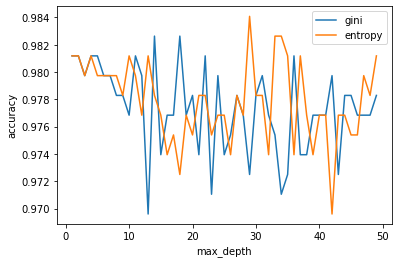

In [170]:
max_depth = []
accuracy_gini = []
accuracy_entropy = []
for i in range(1,50):
 dtree = DecisionTreeClassifier(criterion='gini',max_depth=i)
 dtree.fit(X_train, y_train)
 pred = dtree.predict(X_test)
 accuracy_gini.append(accuracy_score(y_test, pred))
 ####
 dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
 dtree.fit(X_train, y_train)
 pred = dtree.predict(X_test)
 accuracy_entropy.append(accuracy_score(y_test, pred))
 ####
 max_depth.append(i)
 d = pd.DataFrame({'accuracy_gini':pd.Series(accuracy_gini), 
 'accuracy_entropy':pd.Series(accuracy_entropy),
 'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters
plt.plot('max_depth','accuracy_gini', data=d, label='gini')
plt.plot('max_depth','accuracy_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

print(d)

<h1>Decision Tree Afer Applying Mice Algo</h1>

In [171]:
feature_cols =['age','sex','day_ill','his_tired','his_vomit','ttest','mucosal_bleed','abdominal_pain','to_PICU','bleed_hos']
#feature_cols1=['Sex', 'NAge','HCT']
X=df_mice[feature_cols]
y=df_mice.shock
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

    accuracy_gini  accuracy_entropy  max_depth
0        0.981187          0.981187          1
1        0.981187          0.981187          2
2        0.979740          0.979740          3
3        0.981187          0.981187          4
4        0.979740          0.978292          5
5        0.981187          0.981187          6
6        0.981187          0.982634          7
7        0.975398          0.982634          8
8        0.979740          0.973951          9
9        0.968162          0.972504         10
10       0.976845          0.971056         11
11       0.976845          0.973951         12
12       0.975398          0.971056         13
13       0.976845          0.975398         14
14       0.971056          0.971056         15
15       0.979740          0.973951         16
16       0.969609          0.972504         17
17       0.976845          0.975398         18
18       0.971056          0.976845         19
19       0.971056          0.972504         20
20       0.97

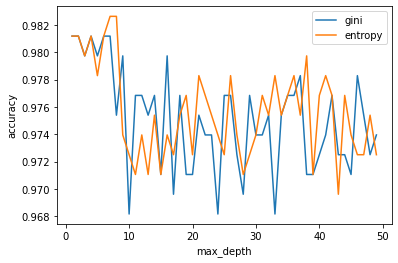

In [172]:
max_depth = []
accuracy_gini = []
accuracy_entropy = []
for i in range(1,50):
 dtree = DecisionTreeClassifier(criterion='gini',max_depth=i)
 dtree.fit(X_train, y_train)
 pred = dtree.predict(X_test)
 accuracy_gini.append(accuracy_score(y_test, pred))
 ####
 dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
 dtree.fit(X_train, y_train)
 pred = dtree.predict(X_test)
 accuracy_entropy.append(accuracy_score(y_test, pred))
 ####
 max_depth.append(i)
 d = pd.DataFrame({'accuracy_gini':pd.Series(accuracy_gini), 
 'accuracy_entropy':pd.Series(accuracy_entropy),
 'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters
plt.plot('max_depth','accuracy_gini', data=d, label='gini')
plt.plot('max_depth','accuracy_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

print(d)

<h1>Decision Tree Dropping null values</h1>

In [173]:
new_data=df.copy()

In [174]:
new_data1=new_data.drop(['wt','temp','pulse','sys_bp','liver','hct_bsl','plt_bsl','doi_shock','minPLT_3to8','dminPLT_3to8','maxHCT_3to8','dmaxHCT_3to8','maxhemo_3to8'],axis=1)

In [175]:
new_data1=new_data1.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [176]:
new_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2242 entries, 1 to 2300
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2242 non-null   float64
 1   sex             2242 non-null   int64  
 2   day_ill         2242 non-null   int64  
 3   his_tired       2242 non-null   object 
 4   his_vomit       2242 non-null   object 
 5   ttest           2242 non-null   object 
 6   mucosal_bleed   2242 non-null   object 
 7   abdominal_pain  2242 non-null   object 
 8   to_PICU         2242 non-null   int64  
 9   shock           2242 non-null   int64  
 10  bleed_hos       2242 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 210.2+ KB


In [177]:
feature_cols =['age','sex','day_ill','his_tired','his_vomit','ttest','mucosal_bleed','abdominal_pain','to_PICU','bleed_hos']
#feature_cols1=['Sex', 'NAge','HCT']
X=new_data1[feature_cols]
y=new_data1.shock
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

    accuracy_gini  accuracy_entropy  max_depth
0        0.986627          0.986627          1
1        0.986627          0.986627          2
2        0.985141          0.985141          3
3        0.983655          0.982169          4
4        0.982169          0.982169          5
5        0.979198          0.980684          6
6        0.982169          0.982169          7
7        0.980684          0.980684          8
8        0.980684          0.967311          9
9        0.974740          0.979198         10
10       0.980684          0.974740         11
11       0.976226          0.974740         12
12       0.977712          0.974740         13
13       0.979198          0.977712         14
14       0.976226          0.974740         15
15       0.973254          0.977712         16
16       0.976226          0.974740         17
17       0.974740          0.973254         18
18       0.977712          0.976226         19
19       0.970282          0.977712         20
20       0.97

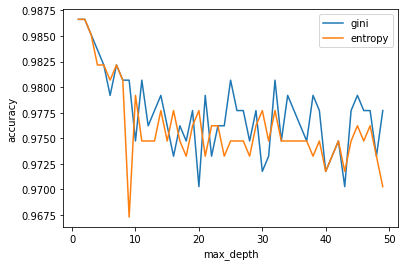

In [178]:
max_depth = []
accuracy_gini = []
accuracy_entropy = []
for i in range(1,50):
 dtree = DecisionTreeClassifier(criterion='gini',max_depth=i)
 dtree.fit(X_train, y_train)
 pred = dtree.predict(X_test)
 accuracy_gini.append(accuracy_score(y_test, pred))
 ####
 dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
 dtree.fit(X_train, y_train)
 pred = dtree.predict(X_test)
 accuracy_entropy.append(accuracy_score(y_test, pred))
 ####
 max_depth.append(i)
 d = pd.DataFrame({'accuracy_gini':pd.Series(accuracy_gini), 
 'accuracy_entropy':pd.Series(accuracy_entropy),
 'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters
plt.plot('max_depth','accuracy_gini', data=d, label='gini')
plt.plot('max_depth','accuracy_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

print(d)

PCA

In [179]:
from sklearn.preprocessing import StandardScaler
from matplotlib import *
import matplotlib.pyplot as plt
from matplotlib.cm import register_cmap
from scipy import stats
from sklearn.decomposition import PCA as sklearnPCA
import seaborn

In [180]:
new_data=df.drop(['doi_shock'],axis=1)
new_data=new_data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)


In [181]:
X_std=StandardScaler().fit_transform(new_data)

In [182]:
mean_vec=np.mean(X_std,axis=0)
cov_mat=(X_std-mean_vec).T.dot((X_std-mean_vec))/(X_std.shape[0]-1)


In [183]:
#Perform eigen decomposition on cocariance matrix
cov_mat=np.cov(X_std.T)
eig_vals,eig_vec=np.linalg.eig(cov_mat)
print('Eigen values: ',eig_vals)
print('Eigen vectors: ',eig_vec)


Eigen values:  [3.08487249 2.05226596 1.8406478  0.12668458 0.11247753 0.23658728
 1.46917402 0.35728845 1.34244227 1.32470188 0.45179717 1.19751464
 1.14581167 0.61435056 0.64094858 1.0422463  0.75008911 0.79502842
 0.80199844 0.85274539 0.87644811 0.94646627 0.94806615]
Eigen vectors:  [[ 2.03181812e-01  4.42452745e-01  1.56076808e-02  1.15165029e-01
   6.65522704e-03 -1.30652637e-02 -3.92547953e-02 -6.57216229e-01
  -2.92412482e-01  5.91359604e-02 -8.14349451e-02  1.87910473e-01
  -2.57099079e-02 -1.18420109e-01  7.61332084e-02  6.04471243e-03
  -1.06328885e-01 -3.22093077e-01  9.52077617e-02 -1.25959422e-01
  -1.34704317e-02 -1.50220057e-01  3.96004556e-02]
 [ 5.90427295e-02  1.23457739e-01 -2.29297231e-01  5.07719182e-02
   6.84611991e-03 -7.20009653e-03  1.52681079e-01 -8.86417043e-02
   7.06015908e-02  2.11038583e-01 -9.22556861e-02  2.30132251e-01
   1.14810373e-01  1.02239067e-01 -3.76893763e-02  1.17211033e-01
  -1.55696002e-03  2.27014078e-01 -2.08372200e-01  9.62931669e-02


In [184]:
#Visualy confirm that the list is correctly sorted by decreasing eigen values
eig_pairs=[(np.abs(eig_vals[i]),eig_vec[:,i]) for i in range(len(eig_vals))]

for i in eig_pairs:
  print(i[0])
            
            


3.084872490584294
2.0522659618747965
1.840647800477344
0.12668458000875735
0.11247753037347745
0.23658727531899984
1.4691740243343343
0.3572884502354293
1.3424422749016787
1.324701875861178
0.45179716962392824
1.1975146369806509
1.145811668799499
0.6143505596188483
0.640948576151706
1.042246303730507
0.7500891125387585
0.7950284235254673
0.8019984438453351
0.8527453868265076
0.8764481131844797
0.9464662721201421
0.9480661492135956


In [185]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit_transform(new_data)
print(pca.explained_variance_ratio_)

[0.80706999 0.19292993]


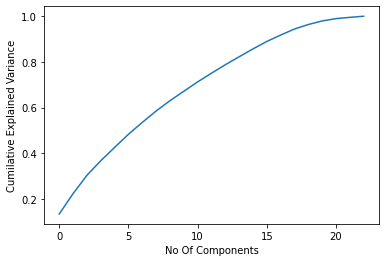

In [186]:
#Explained Variance
pca=PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('No Of Components')
plt.ylabel('Cumilative Explained Variance')
plt.show()

PCA Projection to 2D

In [187]:
#new_data=new_data.drop(['doi_shock'],axis=1)
new_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2160 entries, 2 to 2300
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2160 non-null   float64
 1   sex             2160 non-null   int64  
 2   wt              2160 non-null   float64
 3   day_ill         2160 non-null   int64  
 4   his_tired       2160 non-null   object 
 5   his_vomit       2160 non-null   object 
 6   ttest           2160 non-null   object 
 7   temp            2160 non-null   float64
 8   pulse           2160 non-null   float64
 9   sys_bp          2160 non-null   float64
 10  mucosal_bleed   2160 non-null   object 
 11  abdominal_pain  2160 non-null   object 
 12  liver           2160 non-null   float64
 13  hct_bsl         2160 non-null   float64
 14  plt_bsl         2160 non-null   float64
 15  to_PICU         2160 non-null   int64  
 16  shock           2160 non-null   int64  
 17  bleed_hos       2160 non-null   o

In [188]:
from sklearn.preprocessing import StandardScaler
features = ['age','sex','wt','day_ill','his_tired','his_vomit','ttest','temp','pulse','sys_bp','mucosal_bleed','abdominal_pain','liver','hct_bsl','plt_bsl','to_PICU','bleed_hos','minPLT_3to8','dminPLT_3to8','maxHCT_3to8','dmaxHCT_3to8','maxhemo_3to8']# Separating out the features
# Separating out the features
x = new_data.loc[:, features].values
# Separating out the target
y = new_data.loc[:,['shock']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
print(x)


[[-0.0929835   0.83154337 -0.7709945  ... -0.75833098 -1.05338333
  -1.00840164]
 [ 0.80364307  0.83154337 -1.40044234 ...  0.28959568 -1.05338333
  -0.16228974]
 [-0.0929835   0.83154337 -0.7709945  ...  0.3323682   0.46298321
  -0.01316011]
 ...
 [-0.98961006 -1.2025831  -0.72603394 ... -1.39991872 -1.8115666
  -0.54005268]
 [-0.54129678 -1.2025831  -0.23146778 ... -0.28783329 -0.29520006
   0.10129003]
 [ 1.70026963 -1.2025831   1.20727012 ... -1.03635233  1.22116648
  -1.35725415]]


In [202]:
from sklearn.decomposition import PCA
pca1 = PCA(n_components=2)
principalComponents = pca1.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [196]:
finalDf = pd.concat([principalDf, new_data[['shock']]], axis = 1)

<Figure size 576x576 with 0 Axes>

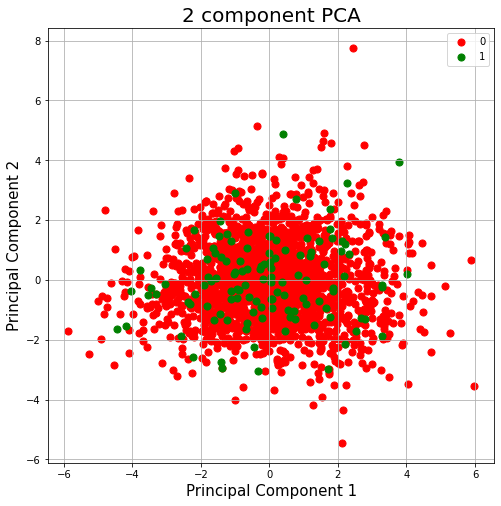

In [203]:
fig = plt.figure(figsize = (8,8))
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = [0,1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['shock'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


In [204]:
print(pca1.explained_variance_ratio_)

[0.13205874 0.0862219 ]
